In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('rectum.csv')

In [ ]:
df.head()

Unnamed: 0  bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   vol  \
0  16/011116    0.186214   0.134686   97.1    54.2     97.2    0.0  54.2   
1  19/004640    0.043601   0.106267  109.1    73.4    389.9  598.4  73.4   
2  17/003069    0.020247   0.023355  112.8    47.1    202.5  962.6  47.1   
3  19/006558    0.079899   0.185824  139.7    52.2    317.9  524.1  52.2   
4  16/009527    0.027489   0.066246  104.2    63.4    269.2  537.4  63.4   

      STD  dosecover  ...  6500  6510  6520  6530  6540  6550  6560  6570  \
0  1945.0        100  ...     0     0     0     0     0     0     0     0   
1  1321.7        100  ...     0     0     0     0     0     0     0     0   
2   782.2        100  ...     0     0     0     0     0     0     0     0   
3  1278.2        100  ...     0     0     0     0     0     0     0     0   
4  1072.1        100  ...     0     0     0     0     0     0     0     0   

   6580  6590  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0  

[5 rows x 677 columns]

In [ ]:
df_1 = df.iloc[:65,:]
df_2 = df.iloc[65:,:]

In [ ]:
df_1.iloc[0:660,6:7]

ptv44
0     0.0
1   598.4
2   962.6
3   524.1
4   537.4
..    ...
60    0.0
61  549.9
62  524.6
63  678.0
64  764.5

[65 rows x 1 columns]

In [ ]:
df_1

Unnamed: 0  bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   vol  \
0   16/011116    0.186214   0.134686   97.1    54.2     97.2    0.0  54.2   
1   19/004640    0.043601   0.106267  109.1    73.4    389.9  598.4  73.4   
2   17/003069    0.020247   0.023355  112.8    47.1    202.5  962.6  47.1   
3   19/006558    0.079899   0.185824  139.7    52.2    317.9  524.1  52.2   
4   16/009527    0.027489   0.066246  104.2    63.4    269.2  537.4  63.4   
..        ...         ...        ...    ...     ...      ...    ...   ...   
60  16/007649    0.017121   0.093434   74.0    39.6    344.6    0.0  39.6   
61  16/009242    0.084231   0.184739  125.6    49.8    204.2  549.9  49.8   
62  16/015357    0.044419   0.076401  110.4    58.9     87.8  524.6  58.9   
63  16/002117    0.046632   0.051213   90.2    37.1    135.1  678.0  37.1   
64  16/000011    0.040579   0.045455  111.5    39.6    248.9  764.5  39.6   

       STD  dosecover  ...  6500  6510  6520  6530  6540  6550  6560  6570  \
0   1945.0        100  ...     0     0     0     0     0     0     0     0   
1   1321.7        100  ...     0     0     0     0     0     0     0     0   
2    782.2        100  ...     0     0     0     0     0     0     0     0   
3   1278.2        100  ...     0     0     0     0     0     0     0     0   
4   1072.1        100  ...     0     0     0     0     0     0     0     0   
..     ...        ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
60  1698.6        100  ...     0     0     0     0     0     0     0     0   
61  1044.7        100  ...     0     0     0     0     0     0     0     0   
62  1697.1        100  ...     0     0     0     0     0     0     0     0   
63  1141.0        100  ...     0     0     0     0     0     0     0     0   
64  1134.1        100  ...     0     0     0     0     0     0     0     0   

    6580  6590  
0      0     0  
1      0     0  
2      0     0  
3      0     0  
4      0     0  
..   ...   ...  
60     0     0  
61     0     0  
62     0     0  
63     0     0  
64     0     0  

[65 rows x 677 columns]

In [ ]:
df_2

Unnamed: 0  bladder_os  rectum_os  ptv60  rectum  bladder  ptv44    vol  \
65  16/000892    0.057769   0.036991   86.3    81.1    100.4  776.1   81.1   
66  17/002728    0.059804   0.112527  134.3    47.1    234.1    0.0   47.1   
67  16/003069    0.039129   0.117347   93.0    39.2    247.9  590.4   39.2   
68  17/001136    0.050830   0.041594  111.1    57.7    198.7  548.3   57.7   
69  16/003706    0.038040   0.130354  141.2    53.7    328.6    0.0   53.7   
70  16/004569    0.042276   0.094142  154.3    47.8    492.0  701.7   47.8   
71  16/009523    0.060548   0.086207  133.1    52.2    208.1  672.3   52.2   
72  16/013254    0.073415   0.081633   88.6    34.3     89.9  449.0   34.3   
73  16/000903    0.036264   0.061129   89.1    63.8    273.0  606.6   63.8   
74  19/006657    0.096964   0.095122   93.2    41.0    102.1  545.8   41.0   
75  16/005552    0.023244   0.065440   78.3    48.9    378.6    0.0   48.9   
76  13/005068    0.079011   0.077834  127.3    59.1    206.3  566.9   59.1   
77  16/003925    0.075415   0.147679   90.2    23.7    132.6  477.9   23.7   
78  16/013022    0.024956   0.098507  114.9    67.0    400.7  575.1   67.0   
79  16/014542    0.048255   0.066946  101.6    47.8    232.1  603.3   47.8   
80  16/011270    0.109173   0.098592  110.9    42.6    177.7  509.5   42.6   
81  19/005925    0.119665   0.124786  119.2    58.5    239.0  492.8   58.5   
82  18/018183    0.099209   0.107317  146.2    41.0    164.3  550.2   41.0   
83  16/010178    0.043838   0.167539  120.2    38.2    241.8  643.4   38.2   
84  16/006849    0.070092   0.100186  170.7    53.9    293.9    0.0   53.9   
85  16/009117    0.049144   0.078788   96.5    49.5    134.3  651.7   49.5   
86  16/000452    0.046029   0.101351   95.3    59.2    197.7    0.0   59.2   
87  18/001315    0.087480   0.159193  129.6    44.6    190.9  443.4   44.6   
88  16/009205    0.023645   0.049538  136.0   119.1    664.0  656.7  119.1   
89  16/003107    0.034663   0.133166  121.1    39.8    458.7    0.0   39.8   
90  18/015376    0.042422   0.125296   85.4    42.3    292.3  524.6   42.3   
91  16/003072    0.072272   0.123832  106.5    42.8    143.9  569.6   42.8   
92  16/014814    0.031579   0.102757  102.4    39.9    285.0  416.4   39.9   
93  17/001801    0.031366   0.040698  113.6    51.6    484.6  579.6   51.6   

       STD  dosecover  ...  6500  6510  6520  6530  6540  6550  6560  6570  \
65   916.6        100  ...     0     0     0     0     0     0     0     0   
66  1744.8        100  ...     0     0     0     0     0     0     0     0   
67  1305.3        100  ...     0     0     0     0     0     0     0     0   
68  1584.7        100  ...     0     0     0     0     0     0     0     0   
69  1842.4        100  ...     0     0     0     0     0     0     0     0   
70  1290.7        100  ...     0     0     0     0     0     0     0     0   
71  1105.5        100  ...     0     0     0     0     0     0     0     0   
72  1464.6        100  ...     0     0     0     0     0     0     0     0   
73   833.3        100  ...     0     0     0     0     0     0     0     0   
74  1498.3        100  ...     0     0     0     0     0     0     0     0   
75  1667.5        100  ...     0     0     0     0     0     0     0     0   
76  1013.3        100  ...     0     0     0     0     0     0     0     0   
77  1416.1        100  ...     0     0     0     0     0     0     0     0   
78  1088.6        100  ...     0     0     0     0     0     0     0     0   
79  1353.6        100  ...     0     0     0     0     0     0     0     0   
80  1389.4        100  ...     0     0     0     0     0     0     0     0   
81  1406.6        100  ...     0     0     0     0     0     0     0     0   
82  1423.4        100  ...     0     0     0     0     0     0     0     0   
83  1091.0        100  ...     0     0     0     0     0     0     0     0   
84  1471.5        100  ...     0     0     0     0     0     0     0     0   
85  1097.6        100  .

In [ ]:
data2=pd.DataFrame()
for i in range(64):
    #d2 = df.iloc[[i],1:7]
    for j in range(660):
        d2 = df_1.iloc[[i],1:7]
        #d2 = pd.concat([d2]*2, ignore_index=True)
        data2 = data2.append(d2, ignore_index = True)
        #data2['Doses'][int(3*i + j)] = j*10
        data2.loc[660*i + j, 'Doses'] = j*10
        data2.loc[660*i + j,'Doses_vol'] = df_1.iloc[i, 17+j]

print(data2)

Streaming output truncated to the last 5000 lines.
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecat

       bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.186214   0.134686   97.1    54.2     97.2    0.0     0.0      100.0
1        0.186214   0.134686   97.1    54.2     97.2    0.0    10.0      100.0
2        0.186214   0.134686   97.1    54.2     97.2    0.0    20.0      100.0
3        0.186214   0.134686   97.1    54.2     97.2    0.0    30.0      100.0
4        0.186214   0.134686   97.1    54.2     97.2    0.0    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
42235    0.046632   0.051213   90.2    37.1    135.1  678.0  6550.0        0.0
42236    0.046632   0.051213   90.2    37.1    135.1  678.0  6560.0        0.0
42237    0.046632   0.051213   90.2    37.1    135.1  678.0  6570.0        0.0
42238    0.046632   0.051213   90.2    37.1    135.1  678.0  6580.0        0.0
42239    0.046632   0.051213   90.2    37.1    135.1  678.0  6590.0        0.0

[42240 rows x 8 columns]


<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-15-cfcecc132d0c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [ ]:
df_1=data2

In [ ]:
df_1

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.186214   0.134686   97.1    54.2     97.2    0.0     0.0      100.0
1        0.186214   0.134686   97.1    54.2     97.2    0.0    10.0      100.0
2        0.186214   0.134686   97.1    54.2     97.2    0.0    20.0      100.0
3        0.186214   0.134686   97.1    54.2     97.2    0.0    30.0      100.0
4        0.186214   0.134686   97.1    54.2     97.2    0.0    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
42235    0.046632   0.051213   90.2    37.1    135.1  678.0  6550.0        0.0
42236    0.046632   0.051213   90.2    37.1    135.1  678.0  6560.0        0.0
42237    0.046632   0.051213   90.2    37.1    135.1  678.0  6570.0        0.0
42238    0.046632   0.051213   90.2    37.1    135.1  678.0  6580.0        0.0
42239    0.046632   0.051213   90.2    37.1    135.1  678.0  6590.0        0.0

[42240 rows x 8 columns]

In [ ]:
data3=pd.DataFrame()
for i in range(28):
    #d2 = df.iloc[[i],1:7]
    for j in range(660):
        d2 = df_2.iloc[[i],1:7]
        #d2 = pd.concat([d2]*2, ignore_index=True)
        data3 = data3.append(d2, ignore_index = True)
        #data2['Doses'][int(3*i + j)] = j*10
        data3.loc[660*i + j, 'Doses'] = j*10
        data3.loc[660*i + j,'Doses_vol'] = df_2.iloc[i, 17+j]

print(data3)

Streaming output truncated to the last 5000 lines.
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecat

       bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.057769   0.036991   86.3    81.1    100.4  776.1     0.0      100.0
1        0.057769   0.036991   86.3    81.1    100.4  776.1    10.0      100.0
2        0.057769   0.036991   86.3    81.1    100.4  776.1    20.0      100.0
3        0.057769   0.036991   86.3    81.1    100.4  776.1    30.0      100.0
4        0.057769   0.036991   86.3    81.1    100.4  776.1    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.031579   0.102757  102.4    39.9    285.0  416.4  6550.0        0.0
18476    0.031579   0.102757  102.4    39.9    285.0  416.4  6560.0        0.0
18477    0.031579   0.102757  102.4    39.9    285.0  416.4  6570.0        0.0
18478    0.031579   0.102757  102.4    39.9    285.0  416.4  6580.0        0.0
18479    0.031579   0.102757  102.4    39.9    285.0  416.4  6590.0        0.0

[18480 rows x 8 columns]


<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-18-aca83c183db9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [ ]:
df_2=data3

In [ ]:
df_2

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.057769   0.036991   86.3    81.1    100.4  776.1     0.0      100.0
1        0.057769   0.036991   86.3    81.1    100.4  776.1    10.0      100.0
2        0.057769   0.036991   86.3    81.1    100.4  776.1    20.0      100.0
3        0.057769   0.036991   86.3    81.1    100.4  776.1    30.0      100.0
4        0.057769   0.036991   86.3    81.1    100.4  776.1    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.031579   0.102757  102.4    39.9    285.0  416.4  6550.0        0.0
18476    0.031579   0.102757  102.4    39.9    285.0  416.4  6560.0        0.0
18477    0.031579   0.102757  102.4    39.9    285.0  416.4  6570.0        0.0
18478    0.031579   0.102757  102.4    39.9    285.0  416.4  6580.0        0.0
18479    0.031579   0.102757  102.4    39.9    285.0  416.4  6590.0        0.0

[18480 rows x 8 columns]

In [ ]:
df_1.columns==df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
y_train=df_1.Doses_vol

In [ ]:
df_1.drop(['Doses_vol'],axis=1, inplace=True)

In [ ]:
df_1

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses
0        0.186214   0.134686   97.1    54.2     97.2    0.0     0.0
1        0.186214   0.134686   97.1    54.2     97.2    0.0    10.0
2        0.186214   0.134686   97.1    54.2     97.2    0.0    20.0
3        0.186214   0.134686   97.1    54.2     97.2    0.0    30.0
4        0.186214   0.134686   97.1    54.2     97.2    0.0    40.0
...           ...        ...    ...     ...      ...    ...     ...
42235    0.046632   0.051213   90.2    37.1    135.1  678.0  6550.0
42236    0.046632   0.051213   90.2    37.1    135.1  678.0  6560.0
42237    0.046632   0.051213   90.2    37.1    135.1  678.0  6570.0
42238    0.046632   0.051213   90.2    37.1    135.1  678.0  6580.0
42239    0.046632   0.051213   90.2    37.1    135.1  678.0  6590.0

[42240 rows x 7 columns]

<Axes: >

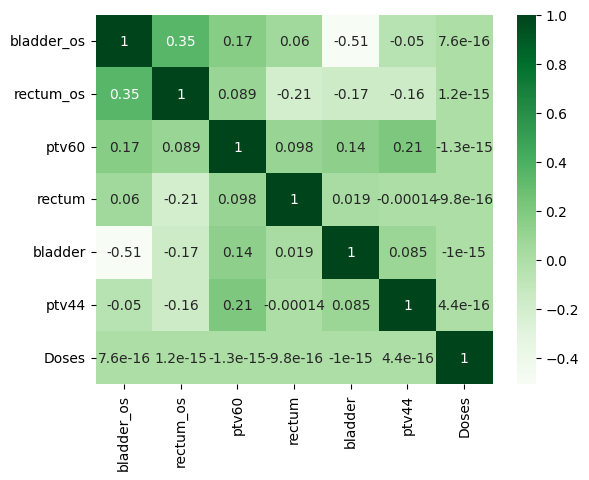

In [ ]:
sns.heatmap(df_1.corr(), annot=True, cmap='Greens')

In [ ]:
X_train=df_1

In [ ]:
df_2

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.057769   0.036991   86.3    81.1    100.4  776.1     0.0      100.0
1        0.057769   0.036991   86.3    81.1    100.4  776.1    10.0      100.0
2        0.057769   0.036991   86.3    81.1    100.4  776.1    20.0      100.0
3        0.057769   0.036991   86.3    81.1    100.4  776.1    30.0      100.0
4        0.057769   0.036991   86.3    81.1    100.4  776.1    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.031579   0.102757  102.4    39.9    285.0  416.4  6550.0        0.0
18476    0.031579   0.102757  102.4    39.9    285.0  416.4  6560.0        0.0
18477    0.031579   0.102757  102.4    39.9    285.0  416.4  6570.0        0.0
18478    0.031579   0.102757  102.4    39.9    285.0  416.4  6580.0        0.0
18479    0.031579   0.102757  102.4    39.9    285.0  416.4  6590.0        0.0

[18480 rows x 8 columns]

In [ ]:
df_V=pd.read_csv('rectum_validation.csv')

In [ ]:
data3=pd.DataFrame()
for i in range(28):
    #d2 = df.iloc[[i],1:7]
    for j in range(660):
        d2 = df_V.iloc[[i],1:7]
        #d2 = pd.concat([d2]*2, ignore_index=True)
        data3 = data3.append(d2, ignore_index = True)
        #data2['Doses'][int(3*i + j)] = j*10
        data3.loc[660*i + j, 'Doses'] = j*10
        data3.loc[660*i + j,'Doses_vol'] = df_V.iloc[i, 17+j]

print(data3)

Streaming output truncated to the last 5000 lines.
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated an

       bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.009171   0.035809   67.8    75.4    621.5  643.7     0.0      100.0
1        0.009171   0.035809   67.8    75.4    621.5  643.7    10.0      100.0
2        0.009171   0.035809   67.8    75.4    621.5  643.7    20.0      100.0
3        0.009171   0.035809   67.8    75.4    621.5  643.7    30.0      100.0
4        0.009171   0.035809   67.8    75.4    621.5  643.7    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.023408   0.081132   92.5    53.0    444.3    0.0  6550.0        0.0
18476    0.023408   0.081132   92.5    53.0    444.3    0.0  6560.0        0.0
18477    0.023408   0.081132   92.5    53.0    444.3    0.0  6570.0        0.0
18478    0.023408   0.081132   92.5    53.0    444.3    0.0  6580.0        0.0
18479    0.023408   0.081132   92.5    53.0    444.3    0.0  6590.0        0.0

[18480 rows x 8 columns]


<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-6-201c7df777b0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
df_V=data3

In [ ]:
df_V

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.009171   0.035809   67.8    75.4    621.5  643.7     0.0      100.0
1        0.009171   0.035809   67.8    75.4    621.5  643.7    10.0      100.0
2        0.009171   0.035809   67.8    75.4    621.5  643.7    20.0      100.0
3        0.009171   0.035809   67.8    75.4    621.5  643.7    30.0      100.0
4        0.009171   0.035809   67.8    75.4    621.5  643.7    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.023408   0.081132   92.5    53.0    444.3    0.0  6550.0        0.0
18476    0.023408   0.081132   92.5    53.0    444.3    0.0  6560.0        0.0
18477    0.023408   0.081132   92.5    53.0    444.3    0.0  6570.0        0.0
18478    0.023408   0.081132   92.5    53.0    444.3    0.0  6580.0        0.0
18479    0.023408   0.081132   92.5    53.0    444.3    0.0  6590.0        0.0

[18480 rows x 8 columns]

In [ ]:
y_Validation=df_V.Doses_vol

In [ ]:
y_Validation

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
18475      0.0
18476      0.0
18477      0.0
18478      0.0
18479      0.0
Name: Doses_vol, Length: 18480, dtype: float64

In [ ]:
X_Validation=df_V.drop(['Doses_vol'],axis=1)

In [ ]:
y_test=df_2.Doses_vol

In [ ]:
X_test=df_2.drop(['Doses_vol'],axis=1)

# Linear Regression

---



In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test.columns

Index(['bladder_os', 'rectum_os', 'ptv60', 'rectum', 'bladder', 'ptv44',
       'Doses'],
      dtype='object')

In [ ]:
X_train.columns

Index(['bladder_os', 'rectum_os', 'ptv60', 'rectum', 'bladder', 'ptv44',
       'Doses'],
      dtype='object')

In [ ]:
pred_y = model.predict(X_test)

In [ ]:
pred_yV = model.predict(X_Validation)

In [ ]:
r2_score(y_Validation,pred_yV)

0.9044492569471556

In [ ]:
newdf = pd.DataFrame({"Actual Value":y_Validation, "Predicted Value":pred_yV})

In [ ]:
newdf

Actual Value  Predicted Value
0             100.0       114.290389
1             100.0       114.106203
2             100.0       113.922017
3             100.0       113.737831
4             100.0       113.553645
...             ...              ...
18475           0.0       -13.222320
18476           0.0       -13.406507
18477           0.0       -13.590693
18478           0.0       -13.774879
18479           0.0       -13.959065

[18480 rows x 2 columns]

In [ ]:
newdf_test = pd.DataFrame({"Actual Value":y_test, "Predicted Value":pred_y})

In [ ]:
newdf

Actual Value  Predicted Value
0             100.0       114.290389
1             100.0       114.106203
2             100.0       113.922017
3             100.0       113.737831
4             100.0       113.553645
...             ...              ...
18475           0.0       -13.222320
18476           0.0       -13.406507
18477           0.0       -13.590693
18478           0.0       -13.774879
18479           0.0       -13.959065

[18480 rows x 2 columns]

In [ ]:
r2_score(y_test,pred_y)

0.9155502247546807

# Decision tree


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
decision_y_pred = regressor.predict(X_test)

In [ ]:
r2_score(y_test,decision_y_pred)

0.8955722233164404

In [ ]:
decision_yV_pred = regressor.predict(X_Validation)

In [ ]:
r2_score(y_Validation,pred_yV)

0.9044492569471556

In [ ]:
newdf = pd.DataFrame({"Actual Value":y_Validation, "Predicted Value":decision_yV_pred})

In [ ]:
newdf

Actual Value  Predicted Value
0             100.0            100.0
1             100.0            100.0
2             100.0            100.0
3             100.0            100.0
4             100.0            100.0
...             ...              ...
18475           0.0              0.0
18476           0.0              0.0
18477           0.0              0.0
18478           0.0              0.0
18479           0.0              0.0

[18480 rows x 2 columns]

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomForest=RandomForestRegressor()

In [ ]:
randomForest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_y_pred=randomForest.predict(X_test)

In [ ]:
rf_yV_pred=randomForest.predict(X_Validation)

In [ ]:
r2_score(y_Validation, rf_yV_pred)

0.9219530229910315

In [ ]:
r2_score(y_test, rf_y_pred)

0.9185734242880137

#**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:
y_pred_GB = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_GB)
print("Mean Squared Error:", mse)

Mean Squared Error: 66.83887532274915


In [ ]:
r2_score(y_test, y_pred_GB)

0.950478079706738

In [ ]:
y_pred_GBV = model.predict(X_Validation)

In [ ]:
r2_score(y_Validation, y_pred_GBV)

0.9356172156981455

# Xtreme Gradient Boosting 

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred_XBG = xgb_model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred_XBG, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 9.42


In [ ]:
r2_score(y_test, y_pred_XBG)

0.934216077674226

In [ ]:
y_pred_XBGV = xgb_model.predict(X_Validation)

In [ ]:
r2_score(y_Validation, y_pred_XBGV)

0.9255619225578268

# Ada Boosting

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Load the iris dataset
iris = load_iris()

In [ ]:
# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [ ]:
# Create an AdaBoost classifier
clf = AdaBoostRegressor(n_estimators=50)

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred_AB=clf.predict(X_test)

In [ ]:
# Test the classifier
score = clf.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9196925930290375


In [ ]:
r2_score(y_test, y_pred_AB)

0.9196925930290375

In [ ]:
y_pred_ABV=clf.predict(X_Validation)

In [ ]:
r2_score(y_Validation, y_pred_ABV)

0.9213991852076516

# Support Vector Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred=model.predict(X_test)
svr_result=pd.DataFrame({"Actual Values":y_test, "predicted_values":y_pred})
svr_result

Actual Values  predicted_values
0              100.0         99.928718
1              100.0         99.928718
2              100.0         99.928718
3              100.0         99.928718
4              100.0         99.928718
...              ...               ...
18475            0.0         -1.372034
18476            0.0         -1.372034
18477            0.0         -1.372034
18478            0.0         -1.372034
18479            0.0         -1.372034

[18480 rows x 2 columns]

In [ ]:
r2_score(y_test, y_pred)

0.9502957584188205

In [ ]:
yV_pred=model.predict(X_Validation)
svr_result=pd.DataFrame({"Actual Values":y_Validation, "predicted_values":yV_pred})
svr_result

Actual Values  predicted_values
0              100.0        103.875459
1              100.0        103.875459
2              100.0        103.875459
3              100.0        103.875459
4              100.0        103.875459
...              ...               ...
18475            0.0         -2.211587
18476            0.0         -2.211587
18477            0.0         -2.211587
18478            0.0         -2.211587
18479            0.0         -2.211587

[18480 rows x 2 columns]

In [ ]:
r2_score(y_Validation, yV_pred)

0.9368095393273177

# Elastic Net

In [ ]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

In [ ]:
enet.fit(X_train, y_train)

ElasticNet(alpha=0.5, random_state=42)

In [ ]:
y_pred = enet.predict(X_test)

In [ ]:
mse = np.mean((y_pred - y_test) ** 2)

In [ ]:
print("Mean squared error: ", mse)

Mean squared error:  117.61282179815207


In [ ]:
r2_score(y_test, y_pred)

0.9128589049646781

In [ ]:
yV_pred = enet.predict(X_Validation)

In [ ]:
r2_score(y_Validation, yV_pred)

0.917173240431447

# Multilevel perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error








In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [ ]:
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [ ]:
y_pred_MLR = mlp.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_MLR)



0.8485366794854228

# Fuzzy rule based prediction

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=4056b981aeb1f84690b6ee655519fa5c6f3c45d66bafb41b798cf7107b1eeffc
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy input variables (dose and volume)
dose = ctrl.Antecedent(df_1.Doses, 'dose')
volume = ctrl.Antecedent(y_train ,'volume')

# Define the fuzzy output variable (radiation toxicity)
toxicity = ctrl.Consequent(np.arange(0, 101, 1), 'toxicity')

# Define the membership functions for the input variables
dose['low'] = fuzz.trimf(dose.universe, [0, 0, 50])
dose['medium'] = fuzz.trimf(dose.universe, [0, 50, 100])
dose['high'] = fuzz.trimf(dose.universe, [50, 100, 100])

volume['low'] = fuzz.trimf(volume.universe, [0, 0, 50])
volume['medium'] = fuzz.trimf(volume.universe, [0, 50, 100])
volume['high'] = fuzz.trimf(volume.universe, [50, 100, 100])

# Define the membership functions for the output variable
toxicity['low'] = fuzz.trimf(toxicity.universe, [0, 0, 50])
toxicity['medium'] = fuzz.trimf(toxicity.universe, [0, 50, 100])
toxicity['high'] = fuzz.trimf(toxicity.universe, [50, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(dose['low'] & volume['low'], toxicity['low'])
rule2 = ctrl.Rule(dose['medium'] & volume['medium'], toxicity['medium'])
rule3 = ctrl.Rule(dose['high'] & volume['high'], toxicity['high'])

# Create the fuzzy control system
toxicity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create a simulation using the control system
toxicity_sim = ctrl.ControlSystemSimulation(toxicity_ctrl)

# Set the inputs to the simulation
toxicity_sim.input['dose'] = 30
toxicity_sim.input['volume'] = 70

# Compute the output
toxicity_sim.compute()

# Print the predicted toxicity value
print("Predicted Toxicity:", toxicity_sim.output['toxicity'])


ValueError: ignored

# Combining multiple models

In [ ]:
from sklearn.ensemble import VotingRegressor



model1 = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = SVR(kernel='rbf')

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

SVR()

In [ ]:
ensemble_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2), ('svr', model3)])
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('svr', SVR())])

In [ ]:
y_pred_Combined = ensemble_model.predict(X_test)


In [ ]:
r2_score(y_test, y_pred_Combined)

In [ ]:
yV_pred_Combined = ensemble_model.predict(X_Validation)

In [ ]:
r2_score(y_Validation, yV_pred_Combined)

0.9351913150091261

# Dose-volume Histogram

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
color_array = [
    'red', 'blue', 'green', 'orange', 'purple',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'gray', 'olive', 'teal', 'navy', 'lime',
    'maroon', 'aqua', 'indigo', 'gold', 'salmon',
    'peru', 'violet', 'tomato', 'turquoise', 'sienna',
    'plum', 'coral', 'steelblue', 'khaki', 'orchid',
    'slategray', 'lightseagreen', 'darkgoldenrod', 'hotpink', 'darkolivegreen',
    'mediumslateblue', 'mediumvioletred', 'chartreuse', 'darkslategray', 'mediumaquamarine'
]




In [ ]:
for i in range(0,29):
    dose=df_2.Doses[i*660:i*660+660]
    vol=y_pred_Combined[i*660:i*660+660]
    plt.plot(dose, vol, '-o', color=color_array[i], linewidth=0.001,antialiased=True,label='DVH 1')
plt.xlabel('Dose (%)')
plt.ylabel('Volume (%)')
plt.title('DVH Histogram')

Text(0.5, 1.0, 'DVH Histogram')

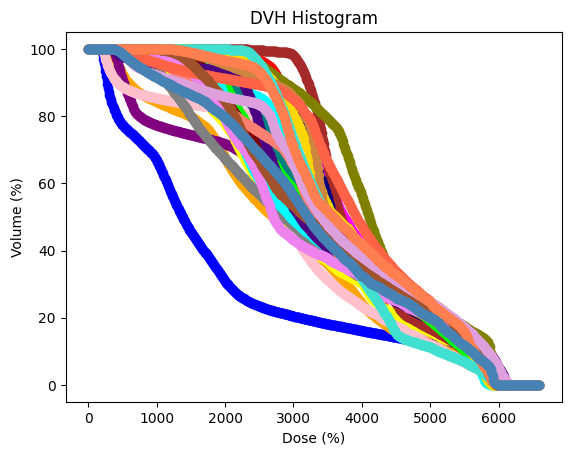

In [ ]:
for i in range(0,29):
    dose=df_2.Doses[i*660:i*660+660]
    vol=y_test[i*660:i*660+660]
    plt.plot(dose, vol, '-o', color=color_array[i], linewidth=0.001,antialiased=True,label='DVH 1')
plt.xlabel('Dose (%)')
plt.ylabel('Volume (%)')
plt.title('DVH Histogram')

# For Bladder

In [ ]:
dfb = pd.read_csv('bladder.csv')

In [ ]:
dfb.head()

Unnamed: 0  bladder_os  rectum_os  ptv60  rectum  bladder  ptv44    vol  \
0  16/011116    0.186214   0.134686   97.1    54.2     97.2    0.0   97.2   
1  19/004640    0.043601   0.106267  109.1    73.4    389.9  598.4  389.9   
2  17/003069    0.020247   0.023355  112.8    47.1    202.5  962.6  202.5   
3  19/006558    0.079899   0.185824  139.7    52.2    317.9  524.1  317.9   
4  16/009527    0.027489   0.066246  104.2    63.4    269.2  537.4  269.2   

      STD  dosecover  ...  6500  6510  6520  6530  6540  6550  6560  6570  \
0  1425.8        100  ...     0     0     0     0     0     0     0     0   
1  1025.0        100  ...     0     0     0     0     0     0     0     0   
2   899.1        100  ...     0     0     0     0     0     0     0     0   
3  1186.7        100  ...     0     0     0     0     0     0     0     0   
4   859.6        100  ...     0     0     0     0     0     0     0     0   

   6580  6590  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0  

[5 rows x 677 columns]

In [ ]:
dfb_1 = dfb.iloc[:65,:]
dfb_2 = dfb.iloc[65:,:]

In [ ]:
data2=pd.DataFrame()
for i in range(64):
    #d2 = df.iloc[[i],1:7]
    for j in range(660):
        d2 = dfb_1.iloc[[i],1:7]
        #d2 = pd.concat([d2]*2, ignore_index=True)
        data2 = data2.append(d2, ignore_index = True)
        #data2['Doses'][int(3*i + j)] = j*10
        data2.loc[660*i + j, 'Doses'] = j*10
        data2.loc[660*i + j,'Doses_vol'] = dfb_1.iloc[i, 17+j]

print(data2)

Streaming output truncated to the last 5000 lines.
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is dep

       bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.186214   0.134686   97.1    54.2     97.2    0.0     0.0      100.0
1        0.186214   0.134686   97.1    54.2     97.2    0.0    10.0      100.0
2        0.186214   0.134686   97.1    54.2     97.2    0.0    20.0      100.0
3        0.186214   0.134686   97.1    54.2     97.2    0.0    30.0      100.0
4        0.186214   0.134686   97.1    54.2     97.2    0.0    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
42235    0.046632   0.051213   90.2    37.1    135.1  678.0  6550.0        0.0
42236    0.046632   0.051213   90.2    37.1    135.1  678.0  6560.0        0.0
42237    0.046632   0.051213   90.2    37.1    135.1  678.0  6570.0        0.0
42238    0.046632   0.051213   90.2    37.1    135.1  678.0  6580.0        0.0
42239    0.046632   0.051213   90.2    37.1    135.1  678.0  6590.0        0.0

[42240 rows x 8 columns]


<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = data2.append(d2, ignore_index = True)
<ipython-input-302-d855f3062b58>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [ ]:
dfb_1=data2

In [ ]:
dfb_1

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.186214   0.134686   97.1    54.2     97.2    0.0     0.0      100.0
1        0.186214   0.134686   97.1    54.2     97.2    0.0    10.0      100.0
2        0.186214   0.134686   97.1    54.2     97.2    0.0    20.0      100.0
3        0.186214   0.134686   97.1    54.2     97.2    0.0    30.0      100.0
4        0.186214   0.134686   97.1    54.2     97.2    0.0    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
42235    0.046632   0.051213   90.2    37.1    135.1  678.0  6550.0        0.0
42236    0.046632   0.051213   90.2    37.1    135.1  678.0  6560.0        0.0
42237    0.046632   0.051213   90.2    37.1    135.1  678.0  6570.0        0.0
42238    0.046632   0.051213   90.2    37.1    135.1  678.0  6580.0        0.0
42239    0.046632   0.051213   90.2    37.1    135.1  678.0  6590.0        0.0

[42240 rows x 8 columns]

In [ ]:
data3=pd.DataFrame()
for i in range(28):
    #d2 = df.iloc[[i],1:7]
    for j in range(660):
        d2 = dfb_2.iloc[[i],1:7]
        #d2 = pd.concat([d2]*2, ignore_index=True)
        data3 = data3.append(d2, ignore_index = True)
        #data2['Doses'][int(3*i + j)] = j*10
        data3.loc[660*i + j, 'Doses'] = j*10
        data3.loc[660*i + j,'Doses_vol'] = dfb_2.iloc[i, 17+j]

print(data3)

Streaming output truncated to the last 5000 lines.
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is dep

       bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.057769   0.036991   86.3    81.1    100.4  776.1     0.0      100.0
1        0.057769   0.036991   86.3    81.1    100.4  776.1    10.0      100.0
2        0.057769   0.036991   86.3    81.1    100.4  776.1    20.0      100.0
3        0.057769   0.036991   86.3    81.1    100.4  776.1    30.0      100.0
4        0.057769   0.036991   86.3    81.1    100.4  776.1    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.031579   0.102757  102.4    39.9    285.0  416.4  6550.0        0.0
18476    0.031579   0.102757  102.4    39.9    285.0  416.4  6560.0        0.0
18477    0.031579   0.102757  102.4    39.9    285.0  416.4  6570.0        0.0
18478    0.031579   0.102757  102.4    39.9    285.0  416.4  6580.0        0.0
18479    0.031579   0.102757  102.4    39.9    285.0  416.4  6590.0        0.0

[18480 rows x 8 columns]


<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3 = data3.append(d2, ignore_index = True)
<ipython-input-305-8b897e9c52fb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [ ]:
dfb_2=data3

In [ ]:
dfb_2

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.057769   0.036991   86.3    81.1    100.4  776.1     0.0      100.0
1        0.057769   0.036991   86.3    81.1    100.4  776.1    10.0      100.0
2        0.057769   0.036991   86.3    81.1    100.4  776.1    20.0      100.0
3        0.057769   0.036991   86.3    81.1    100.4  776.1    30.0      100.0
4        0.057769   0.036991   86.3    81.1    100.4  776.1    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.031579   0.102757  102.4    39.9    285.0  416.4  6550.0        0.0
18476    0.031579   0.102757  102.4    39.9    285.0  416.4  6560.0        0.0
18477    0.031579   0.102757  102.4    39.9    285.0  416.4  6570.0        0.0
18478    0.031579   0.102757  102.4    39.9    285.0  416.4  6580.0        0.0
18479    0.031579   0.102757  102.4    39.9    285.0  416.4  6590.0        0.0

[18480 rows x 8 columns]

In [ ]:
dfb_1.columns==dfb_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
dfb_V=pd.read_csv('bladder_validation.csv')

In [ ]:
data4=pd.DataFrame()
for i in range(28):
    #d2 = df.iloc[[i],1:7]
    for j in range(660):
        d2 = dfb_V.iloc[[i],1:7]
        #d2 = pd.concat([d2]*2, ignore_index=True)
        data4 = data4.append(d2, ignore_index = True)
        #data2['Doses'][int(3*i + j)] = j*10
        data4.loc[660*i + j, 'Doses'] = j*10
        data4.loc[660*i + j,'Doses_vol'] = dfb_V.iloc[i, 17+j]

print(data4)

Streaming output truncated to the last 5000 lines.
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is dep

       bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.009171   0.035809   67.8    75.4    621.5  643.7     0.0      100.0
1        0.009171   0.035809   67.8    75.4    621.5  643.7    10.0      100.0
2        0.009171   0.035809   67.8    75.4    621.5  643.7    20.0      100.0
3        0.009171   0.035809   67.8    75.4    621.5  643.7    30.0      100.0
4        0.009171   0.035809   67.8    75.4    621.5  643.7    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.023408   0.081132   92.5    53.0    444.3    0.0  6550.0        0.0
18476    0.023408   0.081132   92.5    53.0    444.3    0.0  6560.0        0.0
18477    0.023408   0.081132   92.5    53.0    444.3    0.0  6570.0        0.0
18478    0.023408   0.081132   92.5    53.0    444.3    0.0  6580.0        0.0
18479    0.023408   0.081132   92.5    53.0    444.3    0.0  6590.0        0.0

[18480 rows x 8 columns]


<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data4 = data4.append(d2, ignore_index = True)
<ipython-input-310-65ff558c703f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [ ]:
dfb_V=data4

In [ ]:
yb_Validation=dfb_V.Doses_vol

In [ ]:
Xb_Validation=dfb_V.drop(['Doses_vol'],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
y_train=dfb_1.Doses_vol

In [ ]:
dfb_1.drop(['Doses_vol'],axis=1, inplace=True)

In [ ]:
dfb_1

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses
0        0.186214   0.134686   97.1    54.2     97.2    0.0     0.0
1        0.186214   0.134686   97.1    54.2     97.2    0.0    10.0
2        0.186214   0.134686   97.1    54.2     97.2    0.0    20.0
3        0.186214   0.134686   97.1    54.2     97.2    0.0    30.0
4        0.186214   0.134686   97.1    54.2     97.2    0.0    40.0
...           ...        ...    ...     ...      ...    ...     ...
42235    0.046632   0.051213   90.2    37.1    135.1  678.0  6550.0
42236    0.046632   0.051213   90.2    37.1    135.1  678.0  6560.0
42237    0.046632   0.051213   90.2    37.1    135.1  678.0  6570.0
42238    0.046632   0.051213   90.2    37.1    135.1  678.0  6580.0
42239    0.046632   0.051213   90.2    37.1    135.1  678.0  6590.0

[42240 rows x 7 columns]

<Axes: >

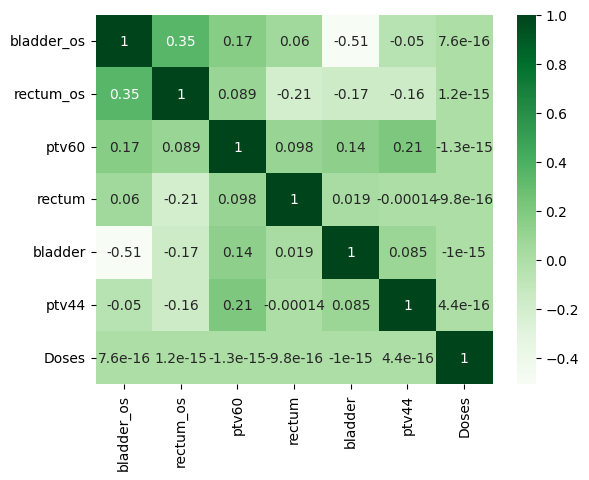

In [ ]:
sns.heatmap(dfb_1.corr(), annot=True, cmap='Greens')

In [ ]:
X_train=dfb_1

In [ ]:
dfb_2

bladder_os  rectum_os  ptv60  rectum  bladder  ptv44   Doses  Doses_vol
0        0.057769   0.036991   86.3    81.1    100.4  776.1     0.0      100.0
1        0.057769   0.036991   86.3    81.1    100.4  776.1    10.0      100.0
2        0.057769   0.036991   86.3    81.1    100.4  776.1    20.0      100.0
3        0.057769   0.036991   86.3    81.1    100.4  776.1    30.0      100.0
4        0.057769   0.036991   86.3    81.1    100.4  776.1    40.0      100.0
...           ...        ...    ...     ...      ...    ...     ...        ...
18475    0.031579   0.102757  102.4    39.9    285.0  416.4  6550.0        0.0
18476    0.031579   0.102757  102.4    39.9    285.0  416.4  6560.0        0.0
18477    0.031579   0.102757  102.4    39.9    285.0  416.4  6570.0        0.0
18478    0.031579   0.102757  102.4    39.9    285.0  416.4  6580.0        0.0
18479    0.031579   0.102757  102.4    39.9    285.0  416.4  6590.0        0.0

[18480 rows x 8 columns]

In [ ]:
y_test=dfb_2.Doses_vol

In [ ]:
X_test=df_2.drop(['Doses_vol'],axis=1)

# Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test.columns

Index(['bladder_os', 'rectum_os', 'ptv60', 'rectum', 'bladder', 'ptv44',
       'Doses'],
      dtype='object')

In [ ]:
X_train.columns

Index(['bladder_os', 'rectum_os', 'ptv60', 'rectum', 'bladder', 'ptv44',
       'Doses'],
      dtype='object')

In [ ]:
pred_yb = model.predict(X_test)

In [ ]:
newdf = pd.DataFrame({"Actual Value":y_test, "Predicted Value":pred_yb})

In [ ]:
newdf

Actual Value  Predicted Value
0             100.0       119.438055
1             100.0       119.248227
2             100.0       119.058400
3             100.0       118.868573
4             100.0       118.678746
...             ...              ...
18475           0.0       -13.647047
18476           0.0       -13.836874
18477           0.0       -14.026701
18478           0.0       -14.216528
18479           0.0       -14.406356

[18480 rows x 2 columns]

In [ ]:
r2_score(y_test,pred_y)

0.8556123293055264

In [ ]:
pred_yV = model.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation,pred_yV)

0.8625017050917079

# Decision Tree

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
decision_y_pred = regressor.predict(X_test)

In [ ]:
r2_score(y_test,decision_y_pred)

0.9155232863785381

In [ ]:
decision_yV_pred = regressor.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation,decision_yV_pred)

0.8905946802967035

# Random Forest Regressor

In [ ]:
randomForest=RandomForestRegressor()

In [ ]:
randomForest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_y_pred=randomForest.predict(X_test)

In [ ]:
r2_score(y_test, rf_y_pred)

0.9335277974592795

In [ ]:
rf_yV_pred=randomForest.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation, rf_yV_pred)

0.9077908089027636

# Gradient Boosting Regression

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_GB = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_GB)
print("Mean Squared Error:", mse)

Mean Squared Error: 94.78697395868028


In [ ]:
r2_score(y_test, y_pred_GB)

0.9372205159758049

In [ ]:
y_pred_GBV = model.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation, y_pred_GBV)

0.9257476031941716

# Xtreme Gradient Boosting

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred_XBG = xgb_model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred_XBG, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 10.17


In [ ]:
r2_score(y_test, y_pred_XBG)

0.9314514491647126

In [ ]:
y_pred_XBGV = xgb_model.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation, y_pred_XBGV)

0.9133891529414502

# XGBoosting

In [ ]:
clf = AdaBoostRegressor(n_estimators=50)

In [ ]:
clf.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred_AB=clf.predict(X_test)

In [ ]:
score = clf.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9143672857481966


In [ ]:
r2_score(y_test, y_pred_AB)


0.9143672857481966

In [ ]:
y_pred_ABV=clf.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation, y_pred_ABV)

0.9010215823109677

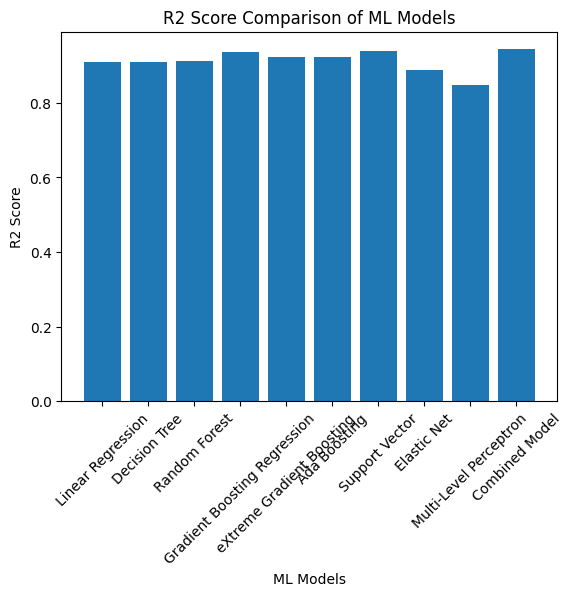

In [ ]:
import matplotlib.pyplot as plt

# Define the ML models and their corresponding R2 scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Regression',
          'eXtreme Gradient Boosting', 'Ada Boosting', 'Support Vector', 'Elastic Net',
          'Multi-Level Perceptron', 'Combined Model']
r2_scores = [0.9088139512286718, 0.9088139512286718, 0.9123865720345384, 0.9368095393273177,
             0.9240976475925327, 0.9239491387576431, 0.9382181785116119, 0.8885590125358062,
             0.8485366794854228, 0.9436789352208865]

# Create a bar graph
plt.bar(models, r2_scores)

# Set the labels and title
plt.xlabel('ML Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of ML Models')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar graph
plt.show()


# Support Vector Regression

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

In [ ]:
y_predSVM=model.predict(X_test)
svr_result=pd.DataFrame({"Actual Values":y_test, "predicted_values":y_predSVM})
svr_result

In [ ]:
r2_score(y_test, y_pred)


In [ ]:
yV_predSVM = enet.predict(Xb_Validation)

In [ ]:
r2_score(yb_Validation, yV_predSVM)

# Elastic Net

In [ ]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

In [ ]:
enet.fit(X_train, y_train)

In [ ]:
y_pred = enet.predict(X_test)

In [ ]:
mse = np.mean((y_pred - y_test) ** 2)

In [ ]:
print("Mean squared error: ", mse)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
yV_predEN = enet.predict(Xb_Validation)

In [ ]:
yV_predEN

In [ ]:

r2_score(yb_Validation, yV_predEN)

# Multilevel Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [ ]:
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [ ]:
y_pred_MLRV = mlp.predict(X_Validation)

In [ ]:
r2_score(y_Validation,y_pred_MLRV)

-1.1966485318682998

# Fuzzy rule based prediction

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



# Define the fuzzy output variable (radiation toxicity)
toxicity = ctrl.Consequent(np.arange(0, 101, 1), 'toxicity')

# Define the membership functions for the input variables
dose['low'] = fuzz.trimf(dose.universe, [0, 0, 50])
dose['medium'] = fuzz.trimf(dose.universe, [0, 50, 100])
dose['high'] = fuzz.trimf(dose.universe, [50, 100, 100])

volume['low'] = fuzz.trimf(volume.universe, [0, 0, 50])
volume['medium'] = fuzz.trimf(volume.universe, [0, 50, 100])
volume['high'] = fuzz.trimf(volume.universe, [50, 100, 100])

# Define the membership functions for the output variable
toxicity['low'] = fuzz.trimf(toxicity.universe, [0, 0, 50])
toxicity['medium'] = fuzz.trimf(toxicity.universe, [0, 50, 100])
toxicity['high'] = fuzz.trimf(toxicity.universe, [50, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(dose['low'] & volume['low'], toxicity['low'])
rule2 = ctrl.Rule(dose['medium'] & volume['medium'], toxicity['medium'])
rule3 = ctrl.Rule(dose['high'] & volume['high'], toxicity['high'])

# Create the fuzzy control system
toxicity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create a simulation using the control system
toxicity_sim = ctrl.ControlSystemSimulation(toxicity_ctrl)

# Set the inputs to the simulation
toxicity_sim.input['dose'] = 30
toxicity_sim.input['volume'] = 70

# Compute the output
toxicity_sim.compute()

# Print the predicted toxicity value
print("Predicted Toxicity:", toxicity_sim.output['toxicity'])

# Combining Multiple models

In [ ]:
from sklearn.ensemble import VotingRegressor



model1 = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = SVR(kernel='rbf')

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

SVR()

In [ ]:
ensemble_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2), ('svr', model3)])
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('svr', SVR())])

In [ ]:
y_pred_Combined = ensemble_model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_Combined)

In [ ]:
yV_pred_Combined = ensemble_model.predict(X_Validation)

In [ ]:
r2_score(y_Validation, yV_pred_Combined)

0.9344323205165678

# DVH Histogram

In [ ]:
for i in range(0,29):
    dose=dfb_2.Doses[i*660:i*660+660]
    vol=yb_test[i*660:i*660+660]
    plt.plot(dose, vol, '-o', color=color_array[i], linewidth=0.001,antialiased=True,label='DVH 1')
plt.xlabel('Dose (%)')
plt.ylabel('Volume (%)')
plt.title('DVH Histogram')

In [ ]:
for i in range(0,29):
    dose=df_2.Doses[i*660:i*660+660]
    vol=y_pred_Combined[i*660:i*660+660]
    plt.plot(dose, vol, '-o', color=color_array[i], linewidth=0.001,antialiased=True,label='DVH 1')
plt.xlabel('Dose (%)')
plt.ylabel('Volume (%)')
plt.title('DVH Histogram')

In [ ]:
import matplotlib.pyplot as plt

# Define the ML models and their corresponding R2 scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Regression',
          'eXtreme Gradient Boosting', 'Ada Boosting', 'Support Vector', 'Elastic Net',
          'Multi-Level Perceptron', 'Combined Model']
r2_scores = [0.9088139512286718, 0.9088139512286718, 0.9123865720345384, 0.9368095393273177,
             0.9240976475925327, 0.9239491387576431, 0.9382181785116119, 0.8885590125358062,
             0.8485366794854228, 0.9436789352208865]

# Create a bar graph
plt.bar(models, r2_scores)

# Set the labels and title
plt.xlabel('ML Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of ML Models')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar graph
plt.show()

*italicized text*# New Section

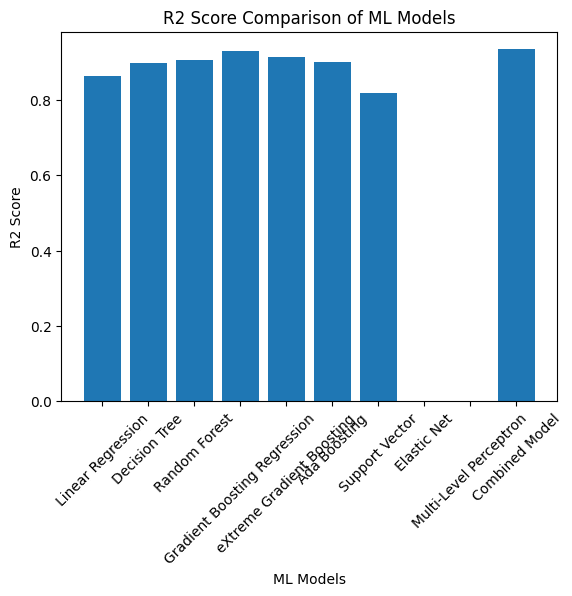

In [ ]:
import matplotlib.pyplot as plt

# Define the ML models and their corresponding R2 scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Regression',
          'eXtreme Gradient Boosting', 'Ada Boosting', 'Support Vector', 'Elastic Net',
          'Multi-Level Perceptron', 'Combined Model']
r2_scores = [0.8625017050917079, 0.897198798791135, 0.9065192792797406, 0.9291345684569985,
             0.9133891529414502, 0.8993781592458701, 0.8181540866084992, 0,
             0, 0.9344323205165678]

# Create a bar graph
plt.bar(models, r2_scores)

# Set the labels and title
plt.xlabel('ML Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of ML Models')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar graph
plt.show()

